# Generation of the Spectrograms for Speech Command Recognition

Download the speech command dataset you want to use.
Here we use the Speech Commands Dataset V1 by Google (https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html). We use a truncated version of this dataset that contains 10 commands.

In [ ]:
!unzip /content/drive/MyDrive/Datasets/speech_commands_v1_10_commands.zip -d .

In [3]:
cd speech_commands_v1_10_commands

/content/speech_commands_v1_10_commands


In [30]:
ls

down/  go/  left/  no/  off/  on/  right/  stop/  up/  yes/


These are the Python package versions used at the time writing this code. You need not use the same versions. Use the latest version that supports all the code given later.

In [ ]:
!pip install librosa==0.10.0
!pip install matplotlib==3.7.1
!pip install opencv-python==4.7.0.72

Example of spectrograms for a particular audio file

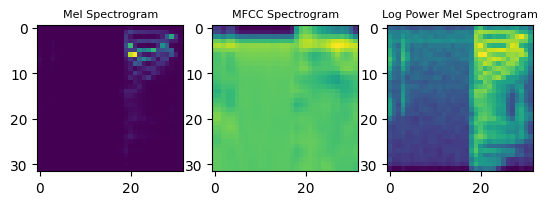

In [28]:
%matplotlib inline
import librosa
import cv2
from matplotlib import pyplot as plt

# Sample Rate
sr = 16000
y, _ = librosa.load('go/b43de700_nohash_1.wav', sr = sr)

# Checks if the audio file is exactly one second long
if(len(y) == sr):
    mel_feat = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=128, power=1.0, n_mels=60, fmin=40.0, fmax=sr/2)
    mfcc_feat = librosa.feature.mfcc(y=y, n_mfcc=12, sr=sr)
    log_power_mel_feat = librosa.power_to_db(mel_feat)


    mel_resized_image = cv2.resize(mel_feat, (32,32))
    mfcc_resized_image = cv2.resize(mfcc_feat, (32,32))
    log_power_mel_resized_image = cv2.resize(log_power_mel_feat, (32,32))

    plt.subplot(1, 3, 1)
    plt.imshow(mel_resized_image)
    plt.title("Mel Spectrogram", fontsize = 8)

    plt.subplot(1, 3, 2)
    plt.imshow(mfcc_resized_image)
    plt.title("MFCC Spectrogram", fontsize = 8)

    plt.subplot(1, 3, 3)
    plt.imshow(log_power_mel_resized_image)
    plt.title("Log Power Mel Spectrogram", fontsize = 8)

    plt.show()

Create the dataset containing spectrograms of the corresponding audio files of speech commands

In [ ]:
%matplotlib inline
import librosa
import cv2
import os
from matplotlib import pyplot as plt

target_path = '/content/speech_commands_mel/'
starting_path = '/content/speech_commands_v1_10_commands/'

# Commands used
labels = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

# Creating the folder and subfolders for the dataset

# Create the target path directory, if already created, pass
try:
  os.mkdir(target_path)
except:
  pass

for command in labels:
  try:
    os.mkdir(target_path + command)
  except:
    pass

sr = 16000

for label in labels:
    for f in os.listdir(starting_path + label):
        if(f.endswith('.wav')):
            file_name = f[0:-4]
            y, _ = librosa.load(starting_path + label + '/' + f, sr = sr)
            if(len(y) == sr):
                # Comment out the code for the spectrograms you're not using
                # Mel Spectrogram
                features = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=128, power=1.0, n_mels=60, fmin=40.0, fmax=sr/2)
                
                # MFCC
                # features = librosa.feature.mfcc(y=y, n_mfcc=12, sr=sr)
                
                
                # Log Power Mel Spectrogram
                # mel_features = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=128, power=1.0, n_mels=60, fmin=40.0, fmax=sr/2)
                # features = librosa.power_to_db(mel_features)


                resized_image = cv2.resize(features, (32,32))
                plt.imsave(target_path + label + '/' + file_name + '.png', resized_image)

Now, you should have a folder with the commands as subdirectories, and the spectrogram images in there.